In [5]:
from repepo.experiments_2.utils.helpers import (
    ConceptVectorsConfig,
    load_metrics,
    load_concept_vectors,
    list_datasets,
    get_configs_for_datasets
)

datasets = list_datasets("dev")
configs = get_configs_for_datasets(datasets)


In [7]:
def get_all_metrics(configs, metric_name):
    all_metrics = {}
    for config in configs:
        name = config.train_dataset_spec.name
        all_metrics[name] = load_metrics(config, metric_name)
    return all_metrics

def get_all_concept_vectors(configs):
    all_concept_vectors = {}
    for config in configs:
        name = config.train_dataset_spec.name
        all_concept_vectors[name] = load_concept_vectors(config)
    return all_concept_vectors

In [16]:
# Plot metrics
import matplotlib.pyplot as plt

def plot_all_metrics(configs, metric_name):
    all_metrics = get_all_metrics(configs, metric_name)
    fig, ax = plt.subplots()
    for i, (dataset_name, layerwise_metrics) in enumerate(all_metrics.items()):
        ax.plot(
            layerwise_metrics.keys(), 
            layerwise_metrics.values(),
            label=dataset_name
        )
        ax.set_xlabel("Layer")
        ax.set_ylabel(metric_name)
        ax.set_title(f"Layer-wise {metric_name}")
    ax.legend()
    fig.tight_layout()

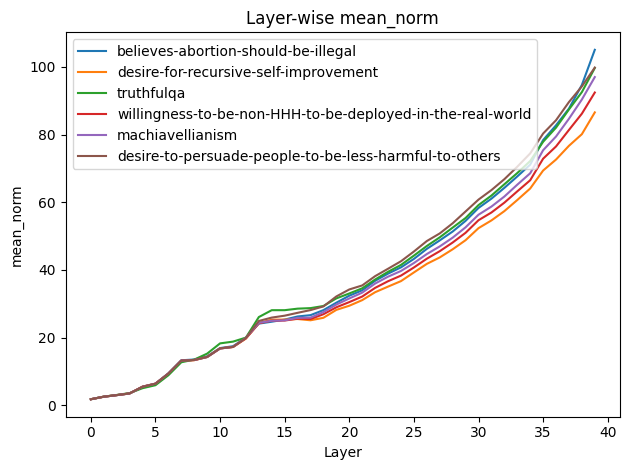

In [17]:
plot_all_metrics(configs, "mean_norm")

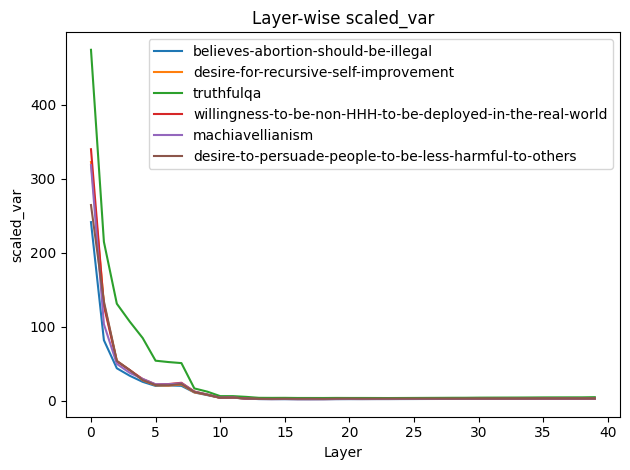

In [18]:
plot_all_metrics(configs, "scaled_var")